In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#-*- coding: utf-8 -*-
import pandas as pd
capop=pd.read_csv('card_population.csv',index_col=0)
park=pd.read_csv('flow_park_mise.csv',index_col=0)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [101]:
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [103]:
class_feature_means = pd.DataFrame(columns=park.자치구코드)
for c, rows in park.groupby('자치구코드'):
    class_feature_means[c] = rows.mean()
class_feature_means

자치구코드,강남구,강동구,강북구,강서구,관악구,광진구,구로구,노원구,도봉구,동대문구,...,마포구,서대문구,서초구,성동구,성북구,영등포구,용산구,은평구,중구,중랑구
총생활인구수,8.209574e+05,4.856051e+05,3.085834e+05,5.473054e+05,502355.221914,385667.165278,4.026990e+05,5.340857e+05,2.998324e+05,3.759981e+05,...,4.789370e+05,3.719692e+05,6.117397e+05,347144.331484,4.406273e+05,485605.983380,300696.673157,4.483720e+05,300642.687414,3.659521e+05
공원면적,2.146595e+06,1.934993e+06,1.567126e+06,3.209226e+06,442644.000000,43788.000000,2.705529e+06,1.445778e+07,1.040386e+06,8.892950e+05,...,1.089289e+06,1.352120e+06,1.682338e+06,596629.000000,1.478049e+06,285537.000000,497780.000000,6.123969e+06,237759.000000,2.982954e+06
공원수,1.340000e+02,7.400000e+01,4.500000e+01,1.390000e+02,76.000000,38.000000,4.700000e+01,1.180000e+02,6.000000e+00,4.300000e+01,...,8.100000e+01,5.000000e+01,1.140000e+02,48.000000,4.300000e+01,42.000000,42.000000,9.800000e+01,32.000000,5.200000e+01
미집행면적,8.052070e+05,8.987450e+05,4.689320e+05,1.472431e+06,289624.000000,12634.000000,3.139740e+05,8.526580e+05,8.200640e+05,4.010310e+05,...,1.845000e+03,7.635590e+05,1.166287e+06,140450.000000,3.290640e+05,162935.000000,160636.000000,1.875360e+06,4.000000,1.288636e+06
예상총면적,2.951802e+06,2.833738e+06,2.036058e+06,4.681657e+06,732268.000000,56422.000000,3.019503e+06,1.531044e+07,1.860450e+06,1.290326e+06,...,1.091134e+06,2.115679e+06,2.848625e+06,737079.000000,1.807113e+06,448472.000000,658416.000000,7.999329e+06,237763.000000,4.271590e+06
1인당면적,2.919556e+00,4.005602e+00,5.004208e+00,6.005548e+00,1.000000,0.000000,6.959497e+00,2.717036e+01,3.595537e+00,2.048679e+00,...,2.026389e+00,3.773611e+00,3.016598e+00,1.998613,3.098611e+00,0.998615,2.002782,1.373194e+01,1.002766,8.052999e+00
공원당인구수,6.126540e+03,6.562204e+03,6.857401e+03,3.937449e+03,6609.932039,10149.123611,8.568047e+03,4.526147e+03,4.997207e+04,8.744142e+03,...,5.912800e+03,7.439383e+03,5.366152e+03,7232.184466,1.024715e+04,11562.038781,7159.454798,4.575222e+03,9395.102351,7.037524e+03


In [156]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in park.groupby('지역'):
    rows = rows.drop(['지역'], axis=1)
    s = np.zeros((12,12))
    for index, row in rows.iterrows():
            x, mc = row.values.reshape(12,1), class_feature_means[c].values.reshape(12,1)
            s += (x - mc).dot((x - mc).T)
            within_class_scatter_matrix += s

ValueError: cannot reshape array of size 5047 into shape (12,1)

In [158]:
park.target_names

AttributeError: 'DataFrame' object has no attribute 'target_names'

In [106]:
df=capop.drop(['기준일자','구코드','업종코드','HDONG_CD'],axis=1)

In [144]:
df=df.drop('연령',axis=1)

In [137]:
park=park.drop('NO2',axis=1)

In [107]:
park.reset_index(drop=True,inplace=True)

In [108]:
len(park)

14674

In [160]:
park.describe()

,총생활인구수,공원면적,공원수,미집행면적,예상총면적,1인당면적,공원당인구수,CO,O3,PM10,PM25,SO2
count,14674.000000,1.467400e+04,14674.000000,1.467400e+04,1.467400e+04,14674.000000,14674.000000,14674.000000,14674.000000,14674.000000,14674.000000,14674.000000
mean,437420.453796,2.245765e+06,63.730476,7.380076e+05,2.983773e+06,4.981805,9371.299646,0.537958,0.022024,44.042263,24.081529,0.004659
std,125107.059761,3.096700e+06,33.456624,8.201827e+05,3.432888e+06,5.916179,9186.460435,0.192612,0.011970,24.662215,15.334941,0.001370
min,147055.000000,4.378800e+04,6.000000,4.000000e+00,5.642200e+04,0.000000,3468.000000,0.100000,0.001500,3.041667,1.083333,0.001083
25%,357010.250000,5.966290e+05,43.000000,1.629350e+05,7.370790e+05,2.000000,6385.000000,0.404167,0.012858,26.913949,13.250000,0.003667
50%,414045.000000,1.478049e+06,50.000000,4.689320e+05,2.036058e+06,3.000000,7155.500000,0.504167,0.020792,39.956944,21.000000,0.004542
75%,494006.250000,2.521302e+06,81.000000,8.987450e+05,3.019503e+06,6.000000,8821.000000,0.637500,0.029458,55.568815,30.957386,0.005542
max,953798.000000,1.445778e+07,139.000000,3.594244e+06,1.531044e+07,31.000000,54132.000000,1.587500,0.086625,232.500000,123.916667,0.014208


In [200]:
park['pm25라벨'][park[30.95<park['PM25']].index]=3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [201]:
park

,지역,총생활인구수,공원면적,공원수,미집행면적,예상총면적,1인당면적,공원당인구수,CO,O3,PM10,PM25,SO2,pm25라벨
0,강남구,668041.0,2146595.0,134,805207.0,2951802.0,3.0,4985.0,0.977083,0.002333,78.562500,57.791667,0.005021,3
1,강동구,505314.0,1934993.0,74,898745.0,2833738.0,4.0,6829.0,0.883333,0.002792,81.250000,54.208333,0.004292,3
2,강북구,332492.0,1567126.0,45,468932.0,2036058.0,5.0,7389.0,0.984211,0.002625,78.166667,65.208333,0.004875,3
3,관악구,529131.0,442644.0,76,289624.0,732268.0,1.0,6962.0,1.258333,0.005375,74.958333,55.750000,0.006375,3
4,광진구,385950.0,43788.0,38,12634.0,56422.0,0.0,10157.0,0.812500,0.005042,79.708333,71.333333,0.004375,3
5,구로구,408474.0,2705529.0,47,313974.0,3019503.0,7.0,8691.0,0.983333,0.006208,79.000000,54.375000,0.007000,3
6,노원구,563873.0,14457777.0,118,852658.0,15310435.0,26.0,4779.0,1.114583,0.004146,82.062500,65.208333,0.006271,3
7,도봉구,323466.0,1040386.0,6,820064.0,1860450.0,3.0,53911.0,0.913043,0.003087,78.304348,47.086957,0.005652,3
8,동대문구,356644.0,889295.0,43,401031.0,1290326.0,2.0,8294.0,1.239583,0.002812,79.791667,62.250000,0.006313,3
9,동작구,416798.0,2521302.0,51,3594244.0,6115546.0,6.0,8173.0,1.234043,0.005875,87.895833,57.666667,0.005708,3


In [114]:
df['연령'].replace('70U',70,inplace=True)

In [139]:
park.columns

Index(['지역', '총생활인구수', '공원면적', '공원수', '미집행면적', '예상총면적', '1인당면적', '공원당인구수',
       'CO', 'O3', 'PM10', 'PM25', 'SO2'],
      dtype='object')

In [140]:
features=['총생활인구수', '공원면적', '공원수', '미집행면적', '예상총면적', '1인당면적', '공원당인구수',
       'CO', 'O3', 'PM10', 'PM25', 'SO2']
x=park.loc[:,features].values
y=park.loc[:,['지역']].values
x=StandardScaler().fit_transform(x)

In [141]:
pd.DataFrame(x,columns=features).head()

,총생활인구수,공원면적,공원수,미집행면적,예상총면적,1인당면적,공원당인구수,CO,O3,PM10,PM25,SO2
0,1.843448,-0.032026,2.100389,0.081935,-0.009313,-0.334992,-0.477491,2.279916,-1.644979,1.399769,2.198332,0.264495
1,0.542702,-0.100359,0.306961,0.195984,-0.043707,-0.165958,-0.276754,1.793171,-1.606688,1.508745,1.964653,-0.267892
2,-0.838738,-0.219157,-0.559863,-0.328079,-0.276079,0.003076,-0.215792,2.316920,-1.620612,1.383719,2.681993,0.158018
3,0.733082,-0.582292,0.366742,-0.546706,-0.655886,-0.673060,-0.262275,3.740151,-1.390872,1.253623,2.065189,1.253216
4,-0.411425,-0.711096,-0.769096,-0.884435,-0.852766,-0.842093,0.085531,1.425407,-1.418720,1.446232,3.081421,-0.207048


In [142]:
features=x.T
np.cov(features)

array([[ 1.0001,  0.2477,  0.8236,  0.1459,  0.2583,  0.1387, -0.298 ,
         0.1251, -0.1556,  0.0695,  0.045 ,  0.1275],
       [ 0.2477,  1.0001,  0.5191,  0.2997,  0.9737,  0.9871, -0.194 ,
         0.0086,  0.0156, -0.0072, -0.0049, -0.0168],
       [ 0.8236,  0.5191,  1.0001,  0.2434,  0.5264,  0.4354, -0.5201,
         0.064 , -0.1096,  0.0374,  0.0254,  0.0565],
       [ 0.1459,  0.2997,  0.2434,  1.0001,  0.5093,  0.3378, -0.0432,
         0.014 ,  0.0119,  0.0139, -0.0021,  0.0441],
       [ 0.2583,  0.9737,  0.5264,  0.5093,  1.0001,  0.9711, -0.1853,
         0.0111,  0.0169, -0.0032, -0.005 , -0.0046],
       [ 0.1387,  0.9871,  0.4354,  0.3378,  0.9711,  1.0001, -0.1599,
        -0.0181,  0.0469, -0.0177, -0.0129, -0.02  ],
       [-0.298 , -0.194 , -0.5201, -0.0432, -0.1853, -0.1599,  1.0001,
         0.0373,  0.0851, -0.0135, -0.0114,  0.0022],
       [ 0.1251,  0.0086,  0.064 ,  0.014 ,  0.0111, -0.0181,  0.0373,
         1.0001, -0.4383,  0.5502,  0.6677,  0.443 ],


In [143]:
eig_vals,eig_vecs=np.linalg.eig(np.cov(features))

In [159]:
pd.DataFrame(eig_vecs)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.269581,-0.098447,0.529781,0.100414,0.248567,0.451912,0.112209,-0.035139,0.582087,0.002333,-0.090650,-8.413300e-15
1,-0.470927,0.079001,-0.224509,-0.055091,-0.241402,0.115581,-0.036176,-0.014867,0.098208,0.015244,0.447824,-6.595150e-01
2,-0.395375,-0.035700,0.436971,0.140780,0.061039,0.156039,0.070553,0.013885,-0.771367,-0.058129,-0.003157,1.786566e-15
3,-0.248447,0.023885,-0.157046,-0.089076,0.816493,-0.437977,0.115055,0.003702,0.008741,-0.012092,-0.051330,-1.746772e-01
4,-0.484167,0.076971,-0.240044,-0.070978,-0.022686,-0.000379,-0.005145,-0.012527,0.090679,0.010862,0.391704,7.311141e-01
5,-0.453830,0.095036,-0.298969,-0.061776,-0.222416,0.044743,-0.065067,-0.016226,0.036428,-0.005020,-0.796547,-6.283180e-14
6,0.199515,0.006990,-0.432724,-0.249820,0.318970,0.724954,0.155614,-0.117861,-0.205217,-0.054420,0.001254,5.914554e-16
7,-0.047226,-0.496681,-0.033458,-0.285344,-0.068618,0.008649,0.257755,0.709015,-0.014236,0.306841,-0.016101,-1.227645e-15
8,0.033910,0.204640,-0.255818,0.801160,0.128840,0.148719,-0.049954,0.448404,0.011802,0.084944,0.006307,4.548733e-16
9,-0.035691,-0.493644,-0.159184,0.333977,-0.025559,-0.042276,0.162070,-0.524988,-0.035381,0.559046,-0.007641,1.584816e-16


In [145]:
pca=PCA(n_components=2)

In [146]:
principalComponents=pca.fit_transform(x)

In [147]:
principaldf=pd.DataFrame(principalComponents,columns=['pc1','pc2'])

In [148]:
park.drop_duplicates(inplace=True)
finaldf=pd.concat([principaldf,park[['지역']]],axis=1)

In [149]:
pca.explained_variance_ratio_

array([0.314 , 0.2347])

In [130]:
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\NanumGothicBold.ttf").get_name()
rc('font', family=font_name)

Text(33.58202777777778, 0.5, '주성분2')

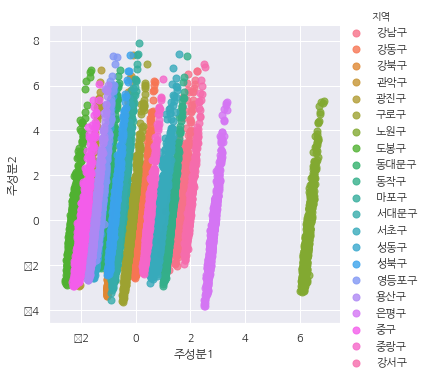

In [150]:
sns.lmplot('pc1', 'pc2', data=finaldf, fit_reg=False,scatter_kws={"s": 50},hue="지역") 
plt.xlabel('주성분1')
plt.ylabel('주성분2')

In [90]:
주성분1: -0.266729총생활인구수-0.472857공원면적공원수-0.389818공원수-0.258216미집행면적-0.487597예상총면적-0.4559861인당면적+0.202372공원당인구수

array([[-2.66729412e-01, -5.65123086e-01,  2.14579655e-01,
         4.70685206e-01, -5.78379261e-01,  8.59055088e-02,
         4.05967315e-15],
       [-4.72856878e-01,  2.49641822e-01, -2.37442814e-01,
         1.18568041e-01, -8.43447031e-02, -4.50349849e-01,
         6.58573343e-01],
       [-3.89818252e-01, -4.67034064e-01,  5.27393750e-02,
         1.47369665e-01,  7.77929916e-01,  1.57066469e-02,
        -1.33808118e-17],
       [-2.58216073e-01,  1.28221406e-01,  8.39367659e-01,
        -4.21803181e-01, -3.04465464e-02,  5.12504869e-02,
         1.75710373e-01],
       [-4.87597109e-01,  2.55478225e-01, -1.21466711e-02,
         5.42636951e-03, -8.32249402e-02, -3.93026132e-01,
        -7.31715120e-01],
       [-4.55985504e-01,  3.28737137e-01, -2.19509726e-01,
         4.17907187e-02, -4.02259759e-02,  7.95273539e-01,
         3.44412186e-14],
       [ 2.02371595e-01,  4.58711329e-01,  3.76729229e-01,
         7.50323534e-01,  2.09085950e-01,  1.55031055e-03,
        -2.3402420

In [131]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())

버전:  3.0.3
설치 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\student\.matplotlib
캐시 위치:  C:\Users\student\.matplotlib
설정 파일 위치:  C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [132]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

print(len(font_list))

450


In [135]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
f[:10]

450


['cmb10',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmr10',
 'STIXNonUnicode',
 'STIXSizeFourSym']

In [136]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothic.ttf')]